<a href="https://colab.research.google.com/github/YaraaShafie/Data-Mining/blob/main/Copy_of_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hana Hesham

ID: 52-1320

Tutorial:5

---

Name: Yara Tamer

ID: 52-4365

Tutorial:5

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

<ipython-input-112-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,SeniorCitizen,tenure
count,7032.00,7032.00
mean,0.16,32.42
std,0.37,24.55
min,0.00,1.00
25%,0.00,9.00
50%,0.00,29.00
75%,0.00,55.00
max,1.00,72.00


In [ ]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
#Checking the unique values for each column
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
#Checking the number of unique values for each column
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [ ]:
#The Column CustomerID does not add any useful infromation to each row so we
#will consider it redundant and will drop from the dataset later at
#the data cleaning part since it has a unique value for each instance

In [ ]:
#Checking the values under each categorical column
#to see if there are any ordinal attributes
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


In [ ]:
#It looks like the attribute 'Contract' is an ordinal categorical attribute
#so we will have to specify this in the dataframe
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [ ]:
#now we will order the data based on its category so the data should start
#with all the 'Month-to-month' then 'One year' then 'Two year'
df[df['Contract'] <= 'Month-to-month']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,$99.65/m,$820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),$89.1/m,$1949.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),$69.5/m,$2625.25,No
7023,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),$102.95/m,NaN,Yes
7024,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),$78.7/m,$1495.1,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No


In [ ]:
#we will now encode the binary attribute 'Churn' into its numerical equivalent
#for use in the bar plot and correlation matrix
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']


0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

## Data Cleaning

In [ ]:
#Removing the $ sign from the TotalCharges first to be able to change its data type from object to numeric later
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '')

# Convert 'TotalCharges' to numeric, calculate median, and replace NaN with median
median_total_charges = pd.to_numeric(df['TotalCharges'], errors='coerce').median()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(median_total_charges).astype(str)

# Convert 'TotalCharges' from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove decimal points from 'TotalCharges' and convert data type from object to numeric
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.replace('\.', '', regex=True), errors='coerce')

#Removing the $ sign from the MonthlyCharges first to be able to change its data type from object to numeric later
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '')

#Removing the /m from the MonthlyCharges to be able to change its data type from object to numeric and removing the decimal points
#df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '').astype(float).round(0).astype(int)

# Remove '$' from 'MonthlyCharges' and convert to numeric
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'].replace('/m', '', regex=True), errors='coerce')

# Drop the 'customerID' attribute because it has a unique value for each instance so it is redundant
df = df.drop(columns=['customerID'])

#Renaming all atributes to start with capital letters
df = df.rename(columns={'gender': 'Gender'})
df = df.rename(columns={'tenure': 'Tenure'})

print (df)

      Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7027    Male              0     Yes        Yes      24          Yes   
7028  Female              0     Yes        Yes      72          Yes   
7029  Female              0     Yes        Yes      11           No   
7030    Male              1     Yes         No       4          Yes   
7031    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

<ipython-input-113-04bcbc3e38f7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalCharges'] = df['TotalCharges'].str.replace('$', '')
<ipython-input-113-04bcbc3e38f7>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '')


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

<ipython-input-87-1ec30bb5a325>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


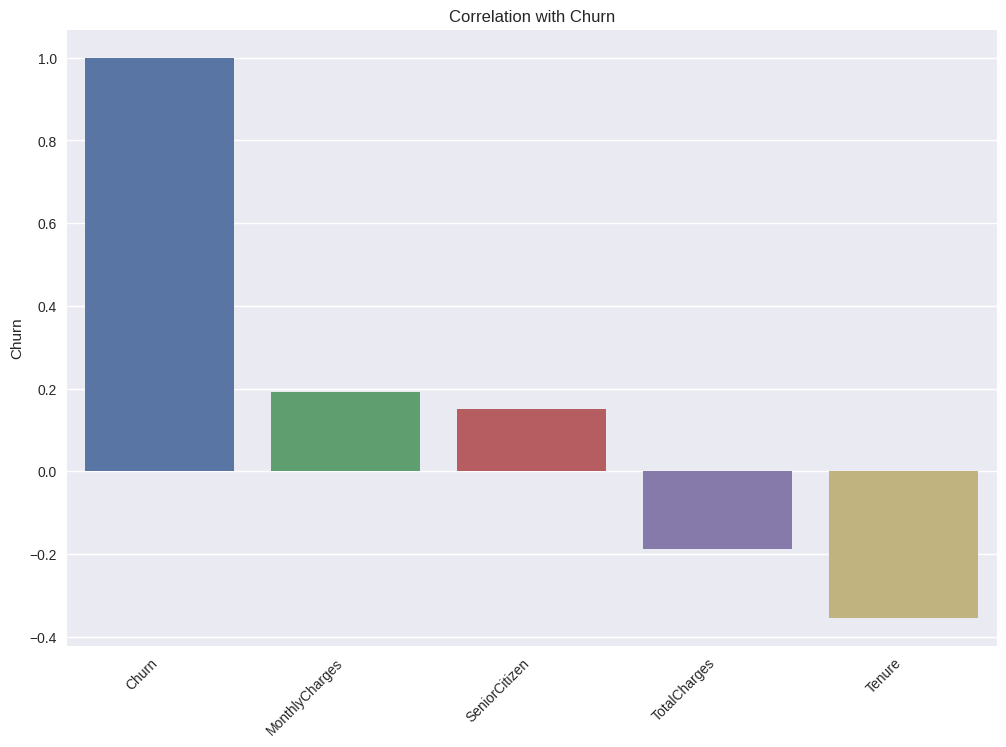

In [ ]:
# Assuming 'Churn' is the column you want to predict
churn_column = 'Churn'

# Calculate correlation matrix
correlation_matrix = df.corr()

# Exclude the 'Churn' column from the correlation matrix since we are interested in its correlation with other columns
correlation_matrix = correlation_matrix[[churn_column]]

# Sort the columns based on their correlation with 'Churn'
correlation_matrix = correlation_matrix.sort_values(by=churn_column, ascending=False)

# Plot the correlation values using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix[churn_column])
plt.xticks(rotation=45, ha='right')
plt.title(f'Correlation with {churn_column}')
plt.show()

**Answer for Q1**: The most correlated column to Churn is Tenure

**Q2: Which payment method has the highest churn rate?**

**Visualization**

<ipython-input-88-5bab127bf518>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  churn_rates = churn_rates.append({'PaymentMethod': payment_method, 'ChurnRate': churn_rate}, ignore_index=True)
<ipython-input-88-5bab127bf518>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  churn_rates = churn_rates.append({'PaymentMethod': payment_method, 'ChurnRate': churn_rate}, ignore_index=True)
<ipython-input-88-5bab127bf518>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  churn_rates = churn_rates.append({'PaymentMethod': payment_method, 'ChurnRate': churn_rate}, ignore_index=True)
<ipython-input-88-5bab127bf518>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

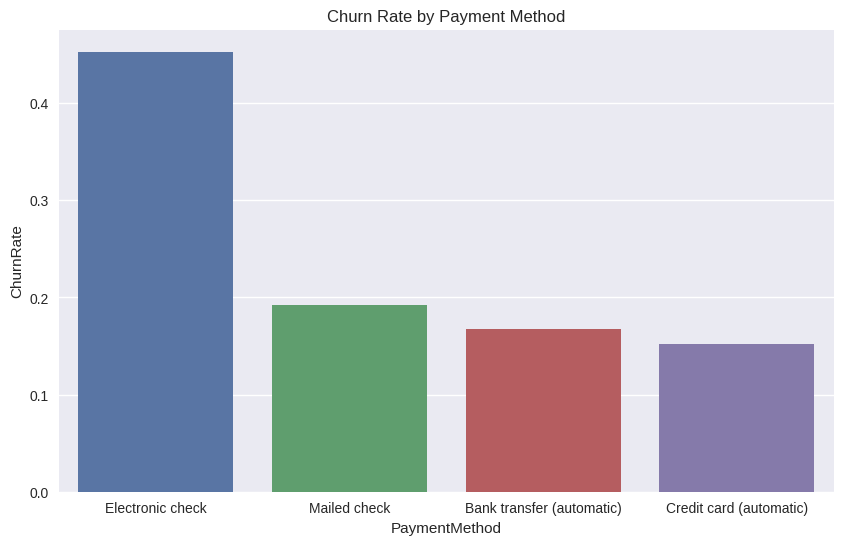

In [ ]:
# Assuming 'Churn' is the column you want to predict and 'PaymentMethod' is the column of interest
churn_column = 'Churn'
payment_method_column = 'PaymentMethod'

# Create a DataFrame to store the churn rates for each payment method
churn_rates = pd.DataFrame(columns=['PaymentMethod', 'ChurnRate'])

# Calculate churn rate for each unique payment method
for payment_method in df[payment_method_column].unique():
    churn_rate = df[df[payment_method_column] == payment_method][churn_column].mean()
    churn_rates = churn_rates.append({'PaymentMethod': payment_method, 'ChurnRate': churn_rate}, ignore_index=True)

# Sort the DataFrame by churn rate in descending order
churn_rates = churn_rates.sort_values(by='ChurnRate', ascending=False)

# Plot the churn rates using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='ChurnRate', data=churn_rates, orient='v')
plt.title('Churn Rate by Payment Method')
plt.show()

**Answer for Q2**: The Payment Method with highest Churn rate is Electronic check

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

In [ ]:
# Assuming 'Churn' is the column you want to predict and 'Tenure' is the column of interest
churn_column = 'Churn'
tenure_column = 'Tenure'

# Create a new DataFrame with only 'Tenure' and 'Churn', filtering out records with 'No' in 'Churn'
filtered_df = df[df[churn_column] == 1][[tenure_column, churn_column]]

# Display the resulting DataFrame
print(filtered_df)

# Assuming 'Tenure' is the column you're interested in
tenure_column = 'Tenure'

# Count occurrences of each unique number in 'Tenure'
tenure_counts = df[tenure_column].value_counts().sort_index()

# Print the result
print(tenure_counts)

# Find the unique number with the maximum count
max_count_tenure = tenure_counts.max()

# Print the result
print(f"The maximum count encountered is: {max_count_tenure}")

      Tenure  Churn
2          2      1
4          2      1
5          8      1
8         28      1
13        49      1
...      ...    ...
7010      12      1
7015       9      1
7021       1      1
7023      67      1
7030       4      1

[1869 rows x 2 columns]
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: Tenure, Length: 72, dtype: int64
The maximum count encountered is: 613


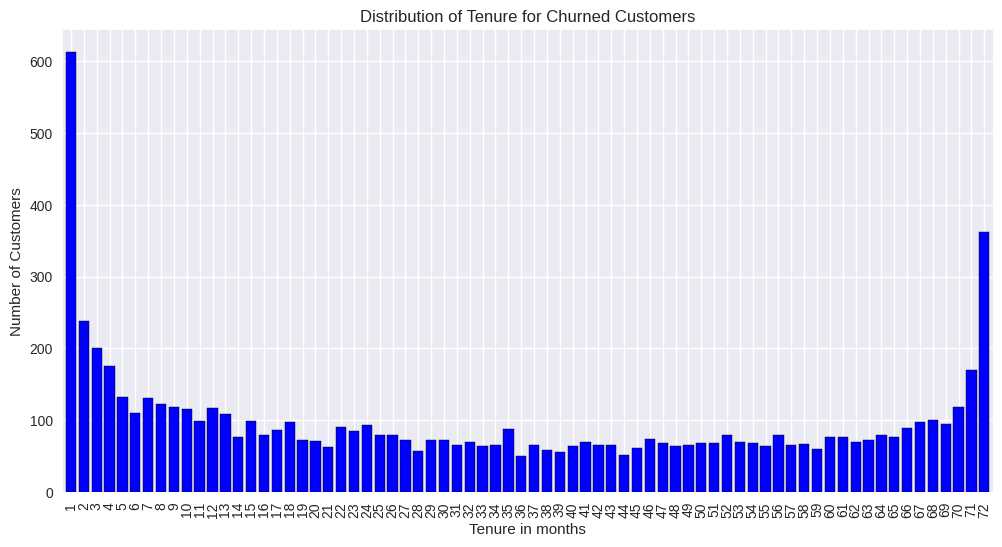

In [ ]:
# Assuming 'Tenure' is the column you're interested in
tenure_column = 'Tenure'

# Count occurrences of each unique number in 'Tenure' and sort in ascending order
tenure_counts = df[tenure_column].value_counts().sort_index()

# Plot a histogram for values of 'Tenure'
plt.figure(figsize=(12, 6))
tenure_counts.plot(kind='bar', width=0.8, color='blue', edgecolor='black')

plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure in months')
plt.ylabel('Number of Customers')
plt.show()

**Answer for Q3**: Customers commonly churn after 47 months

## Data Preparation for Modelling

In [ ]:
# Get a list of column names with categorical data types
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the names of categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ['PaperlessBilling', 'Partner','Dependents', 'PhoneService', 'Gender','MultipleLines',
                       'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaymentMethod', 'Contract']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now, the categorical variables are transformed into numerical values
print(df)

      Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7027       1              0        1           1      24             1   
7028       0              0        1           1      72             1   
7029       0              0        1           1      11             0   
7030       1              1        1           0       4             1   
7031       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [ ]:
# Get the names of all currently present columns
column_names = df.columns

# Print the column names
print("Column Names:")
print(column_names)

Column Names:
Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
numerical_columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

df[numerical_columns] = (

    df[numerical_columns] - df[numerical_columns].min()

) /(

    df[numerical_columns].max() - df[numerical_columns].min()
)


df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.00,0.00,1.00,0.00,0.00,0.00,0.50,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.67,0.12,0.00,0.00
1,1.00,0.00,0.00,0.00,0.46,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.50,0.00,1.00,0.39,0.22,0.00
2,1.00,0.00,0.00,0.00,0.01,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.35,0.01,1.00
3,1.00,0.00,0.00,0.00,0.62,0.00,0.50,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.50,0.00,0.00,0.24,0.21,0.00
4,0.00,0.00,0.00,0.00,0.01,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.67,0.52,0.02,1.00


In [ ]:
# split data
from sklearn.model_selection import train_test_split

x = df.drop('Churn',axis=1) # Independent variable
y = df['Churn'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 5625
Testing dataset size: 1407


## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=x.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

# alternatively, to export:
# graph.render('attrition')

#rule to deduce from this tree
#if we look at the tree we will find:
#if Contract is less than or equal 0.25, gini is equal 0.387, samples is equal 5625, value is equal [4149, 1476] and class is No; if true then we go left
#then if OnlineSecurity is less than or equal 0.25, gini is equal 0.487, samples is equal 3125, value is equal [1815, 1310], and class is No
#then we will go left again and if we find Tenure is less than or equal 0.092, gini is equal 0.5, samples is equal 2104, value is equal [1043, 1061] and class is Yes
#then we will go left; if InternetService is less than or equal 0.25, gini is equal 0.447, samples is equal 838, value is equal [283, 555], and class is equal Yes
#then we will go left; if Total Charges is less than or equal 0.01, gini is equal 0.5, samples is equal 340, value is equal [165, 175], and class is Yes
#then we will go left; if StreamingTV is less than or equal 0.5, gini is equal 0.484, samples is equal 183, value is equal [75, 108], and class is Yes
#then we will go left; if DeviceProtection is less than or equal 0.5, gini is equal 0.491, samples is equal 166, value is equal [72, 94], and class is Yes
#then we will go left; if PaperlessBilling is less than or equal 0.5, gini is equal 0.375, samples is equal 8, value is equal [6, 2], and Class is No
#then we will go left and finally gini is equal 0.0, samples is equal 4, value is equal [4, 0] and class is No
#if Contract is less than or equal 0.25 and OnlineSecurity is less than or equal 0.25 and Tenure is less than or equal 0.092 and InternetService is less than or equal 0.25 and
#Total Charges is less than or equal 0.01 and StreamingTV is less than or equal 0.5 and DeviceProtection is less than or equal 0.5 and PaperlessBilling is less than or equal 0.5 then Classification is No

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 99.84%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   4149.00 1476.00      1.00    5625.00       5625.00
_______________________________________________
Confusion Matrix: 
 [[4147    2]
 [   7 1469]]

Test Result:
Accuracy Score: 71.64%
_______________________________________________
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision    0.80   0.49      0.72       0.64          0.71
recall       0.82   0.46      0.72       0.64          0.72
f1-score     0.81   0.47      0.72       0.64          0.71
support   1014.00 393.00      0.72    1407.00       1407.00
_______________________________________________
Confusion Matrix: 
 [[828 186]
 [213

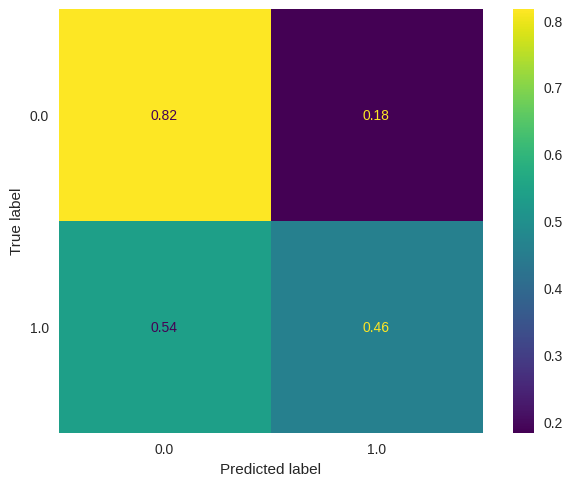

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(x_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(x_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4918032786885246
Recall:  0.4580152671755725
F1_score:  0.4743083003952569


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)
# since we have a relatively small dataset (~1000 records),
# we'll use a low number of splits
skf = StratifiedKFold(n_splits=3)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, x_train, y_train, cv=skf, scoring='f1')
scores

array([0.48      , 0.4939759 , 0.49395161])

In [ ]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.49 (+/- 0.01)


## Bonus (Optional)

In [ ]:
#we will use the logistic regression model
#splitting data
from sklearn.model_selection import train_test_split

x = df.drop('Churn',axis=1) # Independent variable
y = df['Churn'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])


Training dataset size: 4922
Testing dataset size: 2110


In [ ]:
#set the max_iter attribute of logistic regression to at least 2000 so that could find a local optimal solution.
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression( max_iter = 2000 )



In [ ]:
#we will now use the timeit command to measure the execution time for small code snippets
%timeit lr_model.fit(x_train, y_train)

38.4 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
#now we will evaluate the logistic model using its built in 'score' function to evaluate it based on its accuracy
lr_model.score(x_test, y_test)

0.795734597156398

In [ ]:
#and we will use the timeit to measure the execution time for scoring
%timeit lr_model.score(x_test, y_test)

6.07 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
